In [1]:
countries = ['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Korea, Rep.',
 'Kuwait',
 'Kyrgyz Republic',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'Samoa',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Sierra Leone',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Spain',
 'Sri Lanka',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Sudan',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Syrian Arab Republic',
 'Tajikistan',
 'Tanzania',
 'Thailand',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela, RB',
 'Vietnam',
 'Yemen, Rep.',
 'Zambia',
 'Zimbabwe']

In [2]:

import pandas as pd


mort= {'Country Name': countries}
pop = pd.DataFrame(mort)


In [3]:

def new_column(name, csv, column):
    df = pd.read_csv(csv)  
    df = df[['Country Name', column]]  

    df_countries = df['Country Name'].tolist()  
    df_vals = []  

    for country in countries: 
        try:
            index = df_countries.index(country)  
            df_vals.append(df.loc[index, column])

        except:
            print(country)          
    
    if len(df_vals) == 175:  
        pop[name] = df_vals
    else:
        return len(df_vals)

In [4]:
new_column('mortality_rate', 'mortality2.csv', '2015')  
new_column('fertility_rate', 'fertility_rate.csv', '2015 [YR2015]')  
new_column('population', 'popmean.csv', '2015 [YR2015]')  
new_column('hc_expend', 'healthcare_expenditure.csv', '2015') 
new_column('w_lit_pop', 'fertilewomen - fertilewomen3.csv', 'Women Lit Pop')  
new_column('fertile_women_pop', 'fertilewomen - fertilewomen2.csv', 'Women Who are fertile') 
new_column('maternity_leaves', 'matleave2.csv', '2015')  
new_column('gdp','countrygdp.csv', '2015 [YR2015]') 

In [5]:


healthcare_countries = ['Norway', 'New Zealand', 'Japan', 'Germany', 'Belgium', 'United Kingdom', 'Kuwait', 'Sweden', 'Bahrain', 'Brunei', 'Canada', 'Netherlands', 'Austria', 'United Arab Emirates', 'Finland', 'Slovenia', 'Denmark', 'Luxembourg', 'France', 'Australia', 'Ireland', 'Italy', 'Portugal', 'Cyprus', 'Greece', 'Spain', 'South Korea', 'Iceland', 'Hong Kong', 'Singapore', 'Switzerland', 'Israel']

countries_test1 = countries.copy()
for country in countries:
    if country in healthcare_countries:
        countries_test1[countries.index(country)] = 1
    else:
        countries_test1[countries.index(country)] = 0

pop['healthcare'] = countries_test1

In [6]:
import numpy as np
pop.replace(to_replace='..', value=np.nan, inplace=True)  

pop['w_lit_pop'].replace(0, np.nan, inplace=True)   


pop['maternity_leaves']= pd.to_numeric(pop['maternity_leaves'])     
pop= pop[pop['maternity_leaves'].notnull()]
pop['maternity_leaves']= pop['maternity_leaves'].astype(int)

pop["gdp"] = pd.to_numeric(pop["gdp"])
pop= pop[pop['gdp'].notnull()]

pop['population']= pd.to_numeric(pop['population'])
pop= pop[pop['population'].notnull()]

pop['hc_expend']= pd.to_numeric(pop['hc_expend'])
pop= pop[pop['hc_expend'].notnull()]

pop= pop[['Country Name', 'population', 'w_lit_pop', 'fertile_women_pop', 'fertility_rate', 'maternity_leaves', 'gdp', 'healthcare', 'hc_expend', 'mortality_rate']]


In [7]:
pop.head()

,Country Name,population,w_lit_pop,fertile_women_pop,fertility_rate,maternity_leaves,gdp,healthcare,hc_expend,mortality_rate
0,Afghanistan,33736494,NaN,7.586627e+06,4.8,1,569.577923,0,60.088813,396.0
1,Albania,2880703,NaN,7.070754e+05,1.7,1,3952.830781,0,265.903236,29.0
2,Algeria,39871528,NaN,1.073062e+07,2.8,1,4160.220067,0,291.635898,140.0
3,Angola,27859305,NaN,6.348298e+06,5.8,1,3683.552607,0,108.559535,477.0
4,Argentina,43417765,NaN,1.080426e+07,2.3,1,13698.293438,0,997.931375,52.0


In [8]:

import seaborn as sns
sns.set(style='ticks', color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\ydevi\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ydevi\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ydevi\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

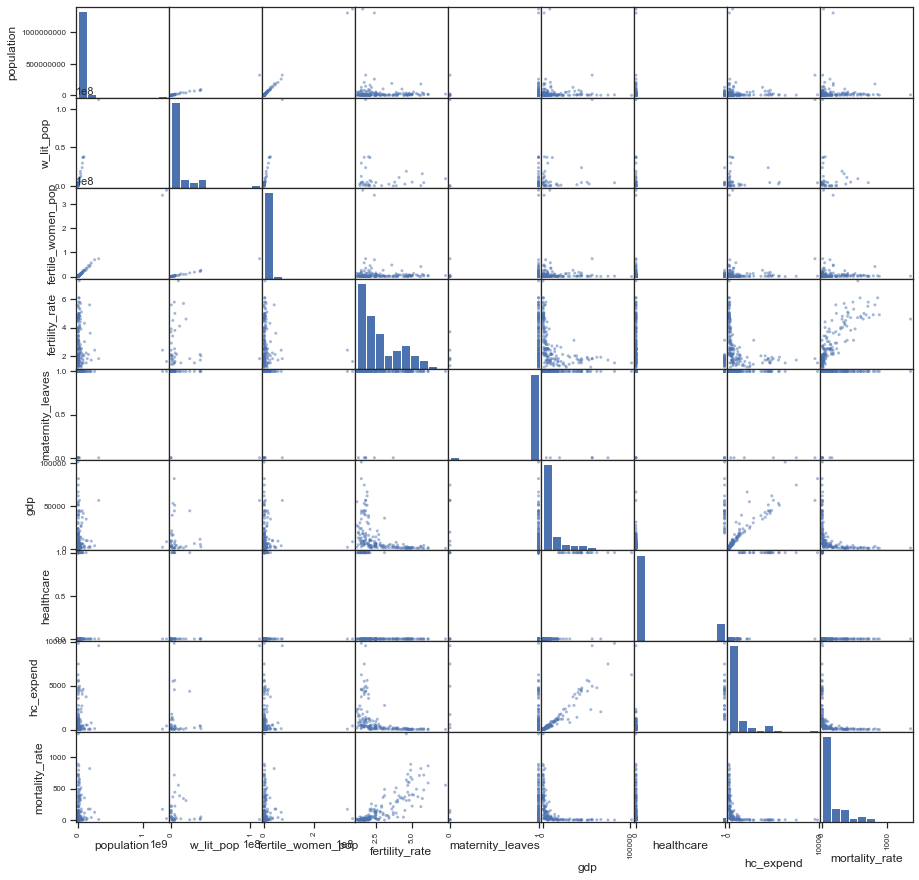

In [9]:

popid= pop.iloc[:,1:]
pd.plotting.scatter_matrix(popid, figsize=[15,15]);

In [10]:

abs(popid.corr())> 0.70

,population,w_lit_pop,fertile_women_pop,fertility_rate,maternity_leaves,gdp,healthcare,hc_expend,mortality_rate
population,True,True,True,False,False,False,False,False,False
w_lit_pop,True,True,True,False,False,False,False,False,False
fertile_women_pop,True,True,True,False,False,False,False,False,False
fertility_rate,False,False,False,True,False,False,False,False,True
maternity_leaves,False,False,False,False,True,False,False,False,False
gdp,False,False,False,False,False,True,True,True,False
healthcare,False,False,False,False,False,True,True,True,False
hc_expend,False,False,False,False,False,True,True,True,False
mortality_rate,False,False,False,True,False,False,False,False,True


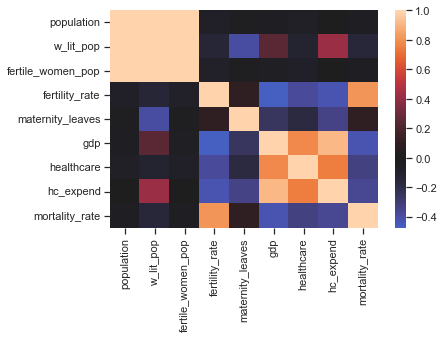

In [11]:
sns.heatmap(popid.corr(), center=0);

In [12]:

pop['fertility_rate']= pop['fertility_rate']**2

In [13]:

cols= ['gdp', 'healthcare', 'hc_expend', 'fertility_rate', 'population', 'fertile_women_pop', 'maternity_leaves', 'mortality_rate']
pop[cols]

,gdp,healthcare,hc_expend,fertility_rate,population,fertile_women_pop,maternity_leaves,mortality_rate
0,569.577923,0,60.088813,23.04,33736494,7.586627e+06,1,396.0
1,3952.830781,0,265.903236,2.89,2880703,7.070754e+05,1,29.0
2,4160.220067,0,291.635898,7.84,39871528,1.073062e+07,1,140.0
3,3683.552607,0,108.559535,33.64,27859305,6.348298e+06,1,477.0
4,13698.293438,0,997.931375,5.29,43417765,1.080426e+07,1,52.0
...,...,...,...,...,...,...,...,...
169,2788.770919,0,98.986144,10.89,264603,6.648900e+04,1,78.0
171,2065.169099,0,116.736194,4.00,93571567,2.594155e+07,1,54.0
172,1285.563019,0,72.039469,16.81,26916207,6.673837e+06,1,385.0
173,1313.889646,0,69.367081,25.00,16100587,3.821330e+06,1,224.0


In [14]:

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data= pd.concat([pop[cols]])
y= data[['mortality_rate']]
x= data.drop(['mortality_rate'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(data, y, test_size= 0.2, random_state= 14)
print('Before scale:')
print ('training set: ',X_train.shape, y_train.shape)
print ('testing set: ',X_test.shape, y_test.shape)
print('shape of data: ',data.shape)
print('-------------------------')
scl= StandardScaler()
Xt_train= scl.fit_transform(X_train)
Xt_test= scl.fit_transform(X_test)
yt_train= scl.fit_transform(y_train)
regressor= LinearRegression()
regressor.fit(Xt_train, yt_train)
print('After scale:')
print ('training scaled set: ',Xt_train.shape, yt_train.shape)
print ('testing scaled set: ',Xt_test.shape, y_test.shape)


Before scale:
training set:  (132, 8) (132, 1)
testing set:  (33, 8) (33, 1)
shape of data:  (165, 8)
-------------------------
After scale:
training scaled set:  (132, 8) (132, 1)
testing scaled set:  (33, 8) (33, 1)


In [15]:
Xt_train 

array([[ 0.38660116, -0.47140452,  0.07225248, ..., -0.08573808,
         0.19841895, -0.71420042],
       [-0.03918241, -0.47140452, -0.14197799, ..., -0.06157479,
         0.19841895, -0.75585744],
       [-0.49405628, -0.47140452, -0.50797854, ..., -0.14713342,
         0.19841895, -0.63088639],
       ...,
       [-0.38420323, -0.47140452, -0.38184469, ..., -0.21894821,
         0.19841895, -0.75122888],
       [-0.67341702, -0.47140452, -0.56017851, ..., -0.13607101,
         0.19841895,  0.86413763],
       [-0.58627205, -0.47140452, -0.48368651, ..., -0.23278426,
         0.19841895, -0.07545951]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mortality_rate   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     284.1
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.66e-34
Time:                        15:46:38   Log-Likelihood:                -820.40
No. Observations:                 132   AIC:                             1645.
Df Residuals:                     130   BIC:                             1651.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.1640     15.205     -1.129      0.261     -47.246      12.918
fertility_rate    18.6029      1.104     16.855      0.000      16.419      20.786
==============================================================================
Omnibus:                       19.506   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.329
Skew:                           0.482   Prob(JB):                     1.59e-12
Kurtosis:                       5.991   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

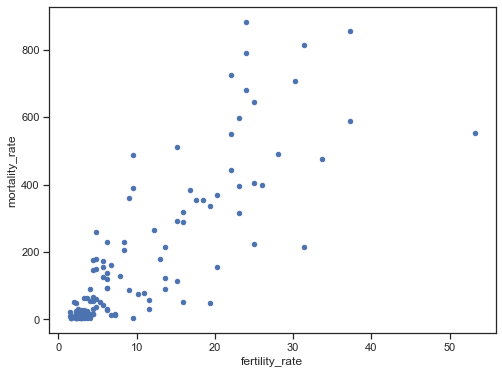

In [16]:

f= 'mortality_rate~fertility_rate'
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

model= ols(formula=f, data=X_train).fit()

mrfr = X_train.plot(kind='scatter', x='fertility_rate', y='mortality_rate', alpha=1) #scatter plot fertile rate vs. mortality rate
model.summary()



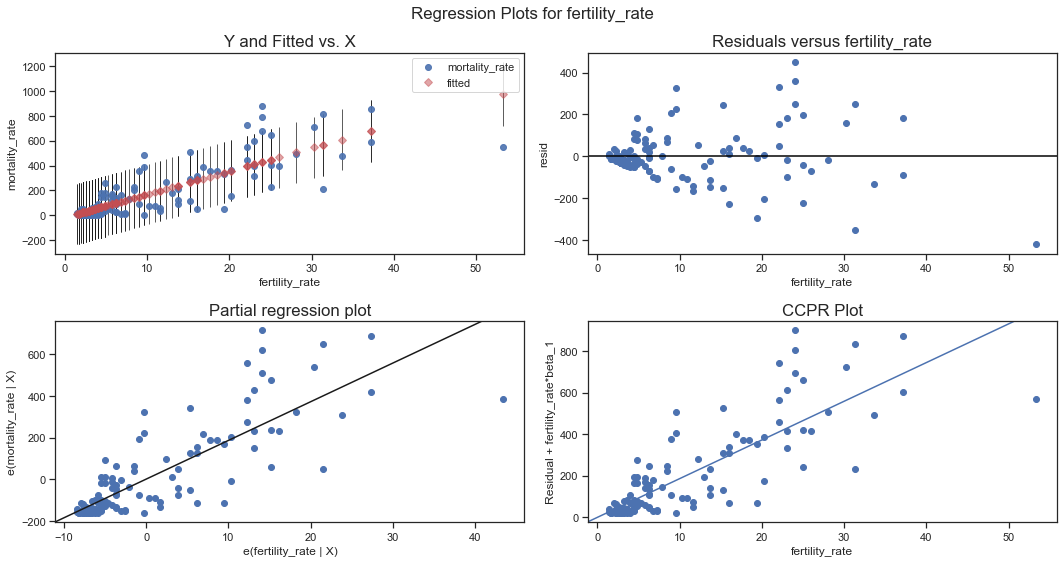

In [17]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'fertility_rate', fig=fig)
plt.show()

In [18]:

features= ['gdp']
X = X_train[features]
Y = X_train.hc_expend

X_sm = X_train[features]
y_sm = X_train.hc_expend
X_sm = sm.add_constant(X_sm) 
sm_model = sm.OLS(y_sm, X_sm).fit()
print(sm_model.summary())
print(sm_model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:              hc_expend   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     647.9
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.40e-52
Time:                        15:46:39   Log-Likelihood:                -1062.6
No. Observations:                 132   AIC:                             2129.
Df Residuals:                     130   BIC:                             2135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -115.3411     80.965     -1.425      0.1

C:\Users\ydevi\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


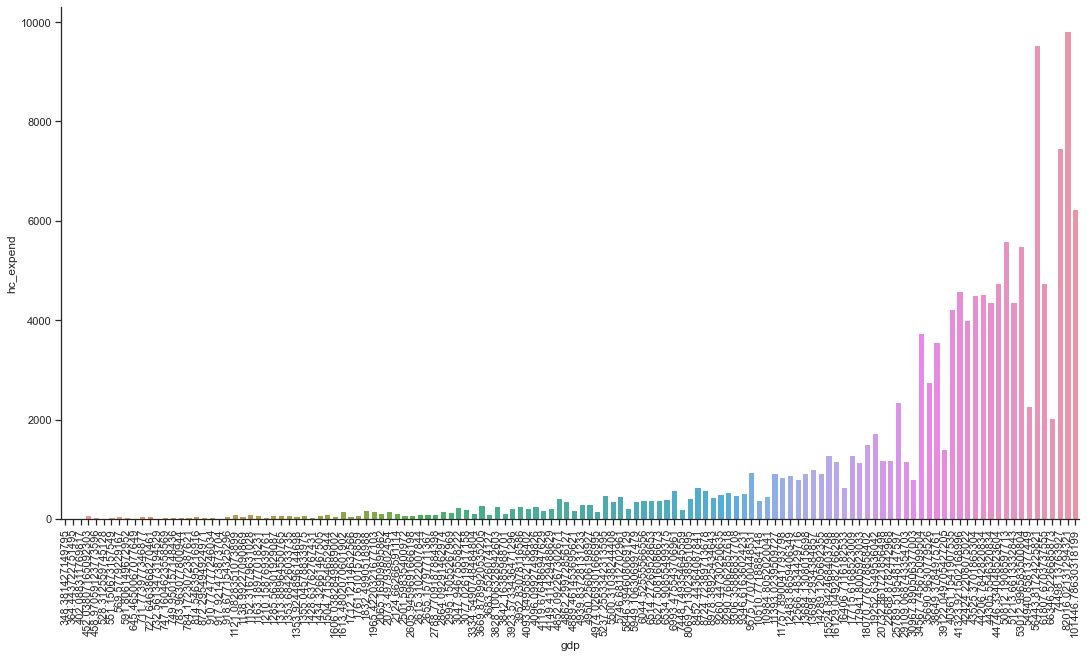

In [19]:
gdp_hc= sns.catplot(y="hc_expend", x="gdp", kind="bar", height=8,aspect=2, data=X_train);
gdp_hc.set_xticklabels(rotation=90)

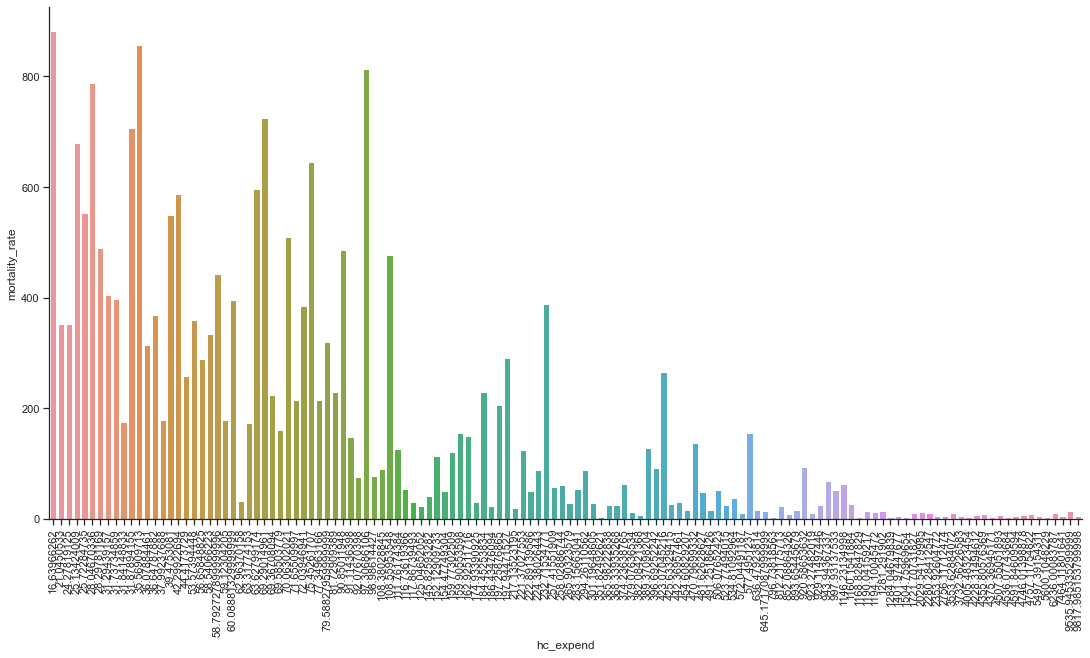

In [20]:

mr_hc=sns.catplot(y="mortality_rate", x="hc_expend", kind="bar", height= 8,aspect=2, data=X_train);
mr_hc.set_xticklabels(rotation=90)

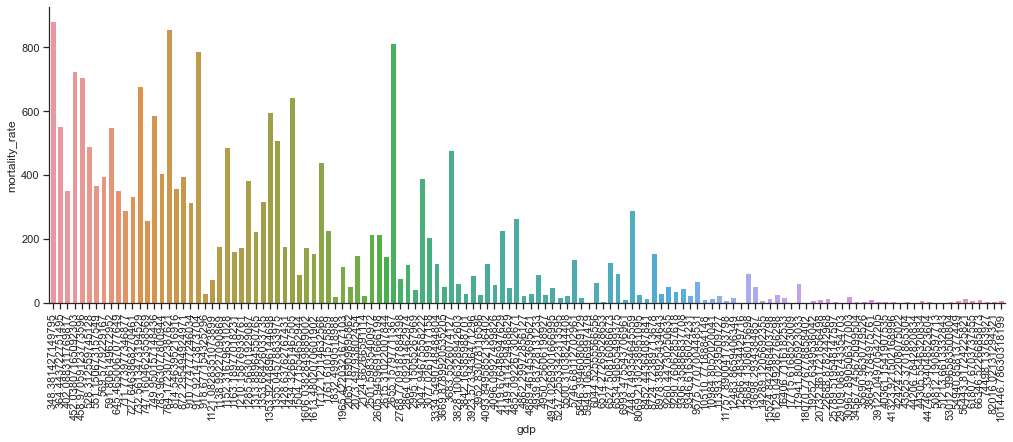

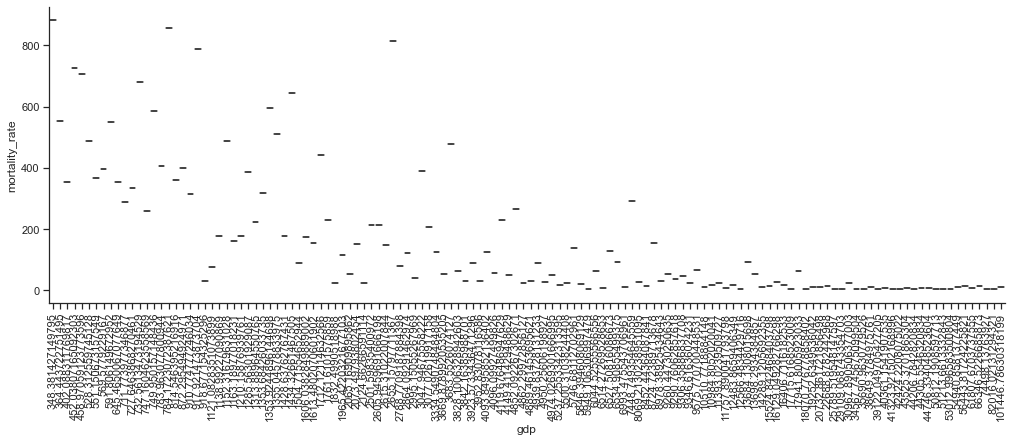

In [21]:

mr_gdp=sns.catplot(y="mortality_rate", x="gdp", kind="bar", aspect=3, data=X_train);
mr_gdp.set_xticklabels(rotation=90)
mr_gdp=sns.catplot(y="mortality_rate", x="gdp", kind="box", aspect=3, data=X_train);
mr_gdp.set_xticklabels(rotation=90)

In [22]:

X= X_train[['fertility_rate', 'gdp', 'healthcare', 'population', 'hc_expend']]
y= X_train['mortality_rate']
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         mortality_rate   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              107.9
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                    5.55e-44
Time:                        15:47:02   Log-Likelihood:                         -818.17
No. Observations:                 132   AIC:                                      1646.
Df Residuals:                     127   BIC:                                      1661.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fertility_rate    17.9739      0.787     22.831      0.000      16.416      19.532
gdp               -0.0015      0.001     -1.063      0.290      -0.004       0.001
healthcare        -4.0866     45.281     -0.090      0.928     -93.690      85.517
population      3.212e-08   6.19e-08      0.519      0.605   -9.04e-08    1.55e-07
hc_expend          0.0055      0.014      0.393      0.695      -0.022       0.033
==============================================================================
Omnibus:                       18.817   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.318
Skew:                           0.440   Prob(JB):                     1.60e-12
Kurtosis:                       6.017   Cond. No.                     7.46e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:

from sklearn.model_selection import train_test_split
from lib.utils import *
X,y=scaler_transform(x)
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X, y, test_size = 0.25, random_state = 45)
ac=[]
from keras.models import Sequential

from keras.layers import Dense
import tensorflow as tf
model=tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=4))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

model.fit(X_train_ts,y_train_ts,epochs=5)
ac.append(accuracy_score(model,y_test_ts,sample_weight=0.2)*100)

Epoch 1/5
4/4 [==============================] - 1s 3ms/step - loss: 0.2541 
Epoch 2/5
4/4 [==============================] - 0s 3ms/step - loss: 0.2269
Epoch 3/5
4/4 [==============================] - 0s 5ms/step - loss: 0.1991
Epoch 4/5
4/4 [==============================] - 0s 3ms/step - loss: 0.1753
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 0.1512


In [24]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  


  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)


  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
def GoogLeNet():

  input_layer = Input(shape = (224, 224, 3))

  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)


  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)


  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)


  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)


  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)


  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)


  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  
  X1 = Dropout(0.7)(X1)
  

  
  
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

 
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
 
  X2 = Dropout(0.7)(X2)
 
  
  
 
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  
  X = Dropout(0.4)(X)

 
 
  
  model = Sequential()
  model.add(Dense(20, input_dim=16, activation='relu'))
  model.add(Dense(10,  activation='tanh'))
  model.add(Dense(1024, activation='relu'))

  model.add(BatchNormalization())
 
  model.add(Dense(1, activation='sigmoid'))

  return model
mod=GoogLeNet()
mod.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
  
  
ac.append(accuracy_score(y_test,mod,sample_weight=0.8)*100)


In [25]:

y_hat_train,y_hat_test=predict(X_train,y_train,X_test,y_test)

In [26]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

C:\Users\ydevi\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mortality_rate'>

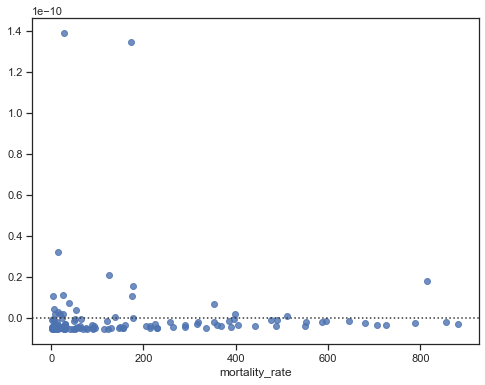

In [27]:

y= y_hat_train - y_train
sns.residplot(y_train, y_hat_train, data=data)

the accuracy of Inception is 93.61 and Googlenet is 89.2


C:\Users\ydevi\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Agorithms,accuracy
0,Inception,93.61
1,Googlenet,89.20


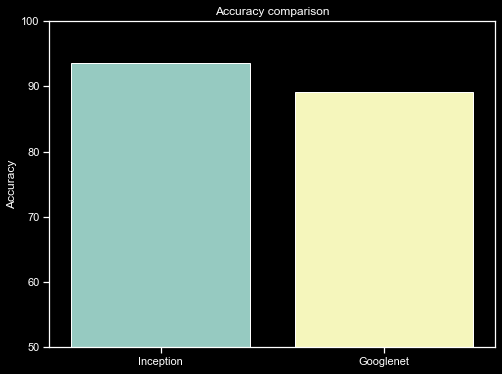

In [28]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('dark_background')
x=['Inception','Googlenet']
 
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)
import pandas as pd
data={'Agorithms':x,
     "accuracy":ac}
df=pd.DataFrame(data)
df.head()